In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample Data
data = pd.DataFrame({
    'Height': [160, 170, 180, 150, 175],
    'Gender': [0, 1, 1, 0, 1]  # 0 = Female, 1 = Male
})

# Show Data
print("Sample Data:")
print(data)

# Split Features and Labels
X = data[['Height']]
y = data['Gender']

# Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train the Decision Tree Model
model = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
model.fit(X_train, y_train)

# Make Predictions
predictions = model.predict(X_test)

# Check Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Predicting a New Person
new_person = pd.DataFrame({'Height': [165]})
prediction = model.predict(new_person)
print("Predicted Gender:", "Male" if prediction[0] == 1 else "Female")

Sample Data:
   Height  Gender
0     160       0
1     170       1
2     180       1
3     150       0
4     175       1
Accuracy: 100.00%
Predicted Gender: Female


In [2]:
train_df=pd.DataFrame({
    'x_train':X_train['Height'],'y_train':y_train
})
train_df

,x_train,y_train
4,175,1
2,180,1
0,160,0
3,150,0


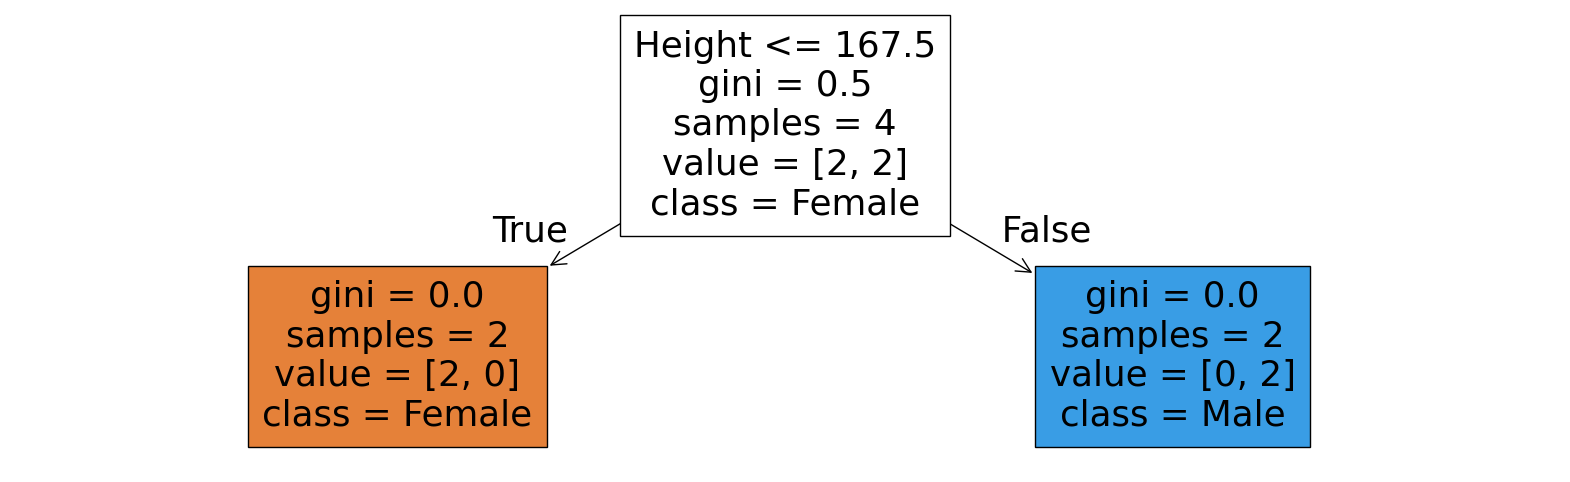

In [3]:
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(20,6))
tree.plot_tree(model, feature_names=['Height'], class_names=['Female', 'Male'], filled=True)
plt.show()

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample Data
data = pd.read_csv('complex_decision_tree_100_samples.csv')

# Show Data
print("Sample Data:")
print(data)

# Split Features and Labels
X = data[['Height', 'Weight', 'Shoe Size']]
y = data['Gender']

# Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train the Decision Tree Model
model = DecisionTreeClassifier(max_depth=4, min_samples_split=2)
model.fit(X_train, y_train)

# Make Predictions
predictions = model.predict(X_test)

# Check Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Predicting a New Person
new_person = pd.DataFrame({'Height': [165], 'Weight': [60], 'Shoe Size': [40]})
prediction = model.predict(new_person)
print("Predicted Gender:", "Male" if prediction[0] == 1 else "Female")

Sample Data:
    Height  Weight  Shoe Size  Gender
0      188      72         41       1
1      178      73         38       0
2      164      86         39       0
3      157      84         39       0
4      170      89         38       1
..     ...     ...        ...     ...
95     158      71         38       1
96     157      60         44       0
97     161      65         40       0
98     183      82         43       1
99     182      58         36       0

[100 rows x 4 columns]
Accuracy: 55.00%
Predicted Gender: Male


In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 4, 6]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 7, 'min_samples_split': 2}


In [6]:
import numpy as np

importance = model.feature_importances_
features = ['Height', 'Weight', 'Shoe Size']

for i, imp in enumerate(importance):
    print(f"{features[i]} Importance: {imp:.4f}")


Height Importance: 0.4747
Weight Importance: 0.3132
Shoe Size Importance: 0.2121


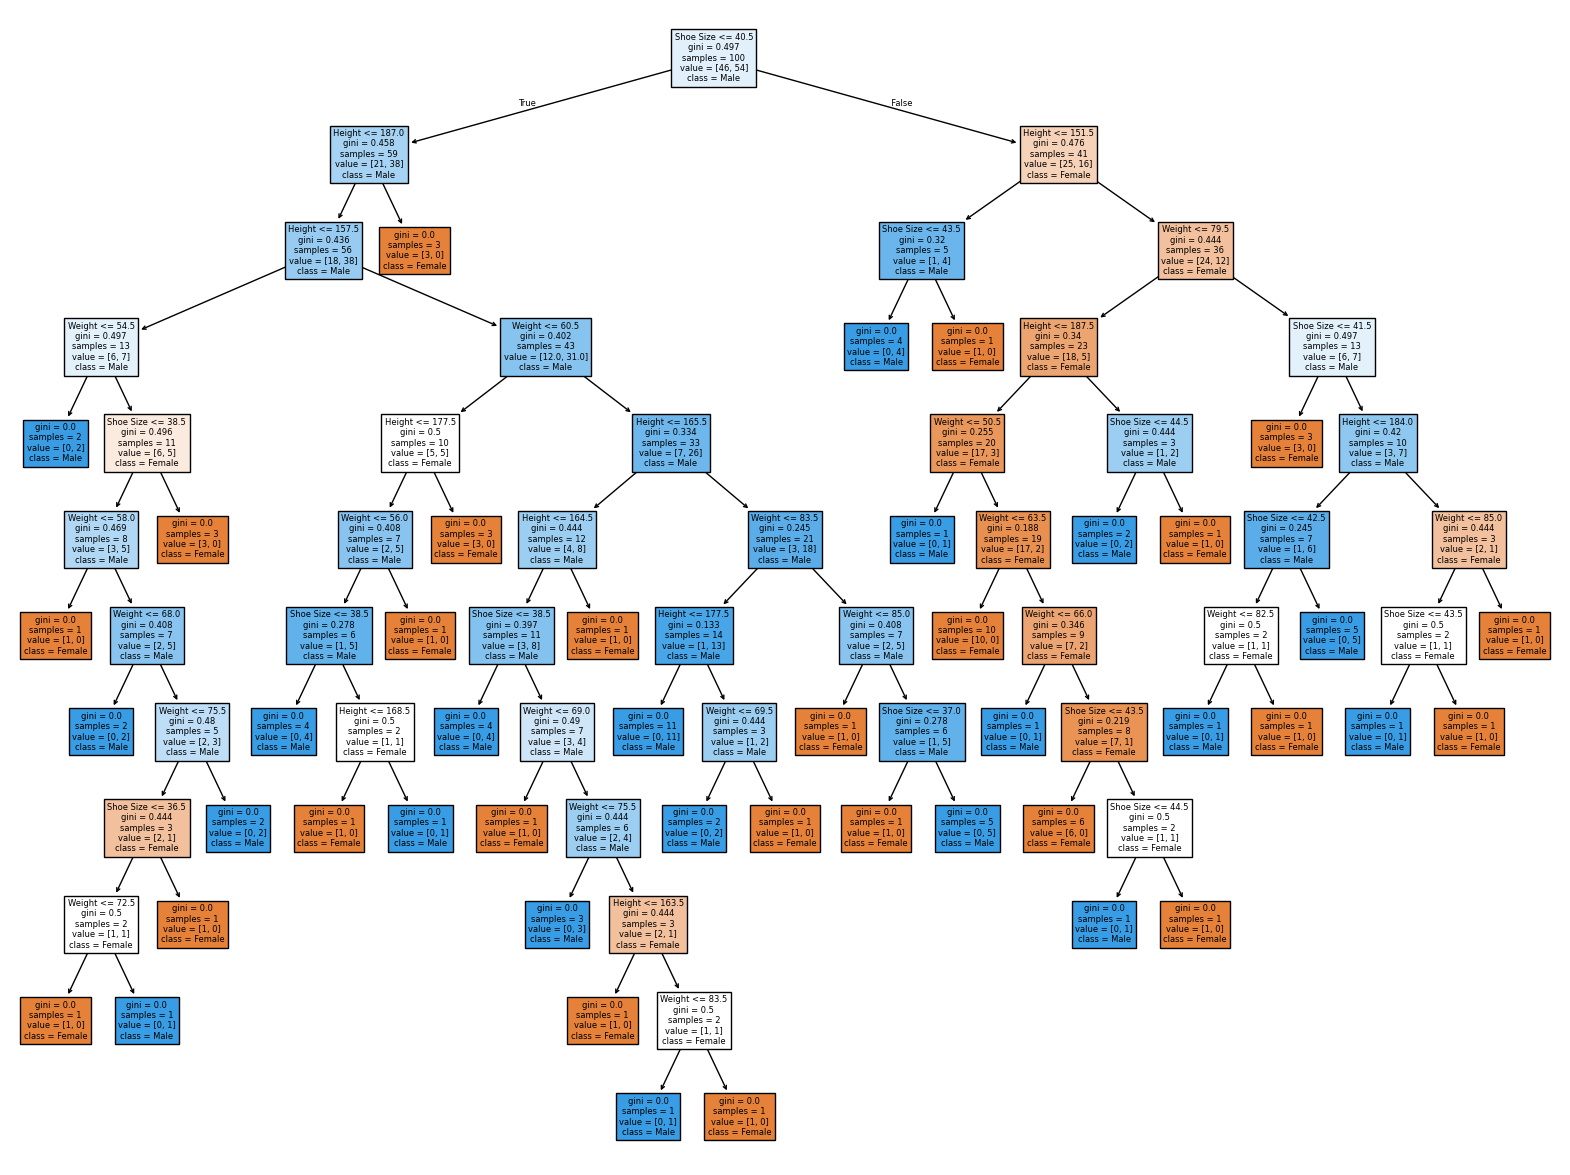

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree with Constraints
model = DecisionTreeClassifier(max_depth=None, min_samples_split=2)
model.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(20,15))
tree.plot_tree(model, feature_names=['Height', 'Weight', 'Shoe Size'], 
               class_names=['Female', 'Male'], filled=True)
plt.show()
